In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LinearRegression

In [5]:
df=pd.read_excel("/content/Nationality.xlsx")
df_last=df.tail(10)
df_last=df.to_csv("french")
french=pd.read_csv("/content/french")

In [6]:
df=pd.read_excel("/content/Nationality.xlsx")
df_last1=df.head(10)
df_last1=df.to_csv("american")
american=pd.read_csv("/content/american")

In [7]:
last=french.head(5)
print(last)

   Unnamed: 0       artist_name  nationality  text
0           0      Aron Douglas            1    11
1           1  Adelaide Labille            1    12
2           2  Albert Bierstadt            1    13
3           3   Adolphe William            1    14
4           4      Albert Ryder            1    15


In [8]:
first=american.head(5)
print(first)

   Unnamed: 0       artist_name  nationality  text
0           0      Aron Douglas            1    11
1           1  Adelaide Labille            1    12
2           2  Albert Bierstadt            1    13
3           3   Adolphe William            1    14
4           4      Albert Ryder            1    15


In [9]:
french.shape,american.shape
american["class"]=1
french["class"]=0

In [10]:
nation = pd.concat([last,first], axis=0)
nation.to_csv("nationn.csv")

In [11]:
merge=pd.concat([french,american],axis=0)
merge.head(10)

,Unnamed: 0,artist_name,nationality,text,class
0,0,Aron Douglas,1,11,0
1,1,Adelaide Labille,1,12,0
2,2,Albert Bierstadt,1,13,0
3,3,Adolphe William,1,14,0
4,4,Albert Ryder,1,15,0
5,5,Alfred Stieglitz,1,16,0
6,6,Alexander,1,17,0
7,7,Robert,1,18,0
8,8,Williamson,1,19,0
9,9,Alfredo Guido,1,20,0


text
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
Name: nationality, dtype: int64


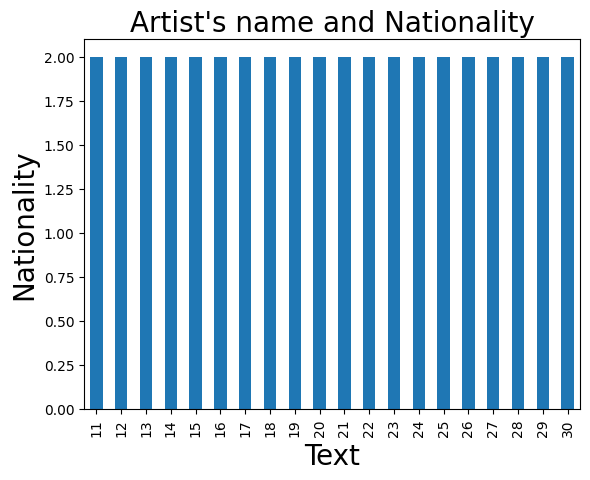

In [12]:
print(merge.groupby(['text'])['nationality'].count())
merge.groupby(['text'])['nationality'].count().plot(kind="bar")
plt.title("Artist's name and Nationality",size=20)
plt.xlabel("Text",size=20)
plt.ylabel("Nationality",size=20)
plt.show()

text
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
Name: nationality, dtype: int64
0=French
1=American


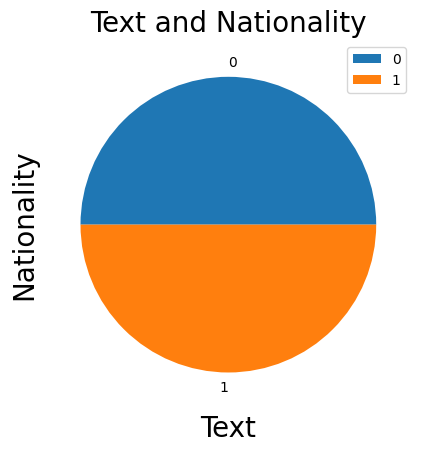

In [13]:
print(merge.groupby(['text'])['nationality'].count())
print("0=French\n1=American")
merge.groupby(['nationality'])['text'].count().plot(kind="pie")
plt.title("Text and Nationality",size=20)
plt.xlabel("Text",size=20)
plt.ylabel("Nationality",size=20)
plt.legend(loc="best")
plt.show()

In [14]:
data=merge.drop(["artist_name","nationality"],axis=1)
data.head(10)

,Unnamed: 0,text,class
0,0,11,0
1,1,12,0
2,2,13,0
3,3,14,0
4,4,15,0
5,5,16,0
6,6,17,0
7,7,18,0
8,8,19,0
9,9,20,0


In [15]:
data.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [16]:
X = data[["text"]]
y = data['class']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
!pip install scikit-learn

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
X_train=X_train.astype(str)
X_test=X_test.astype(str)
Xv_train =vector.fit_transform(X_train)
Xv_test =vector.transform(X_test)
print(X_train.shape)
print(y_train.shape)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
accuracy =LR.score(X_test, y_test).round(2)
print("Accuracy is", accuracy)
pred_LR = LR.predict(X_test)
print(classification_report(y_test, pred_LR))

(32, 1)
(32,)
Accuracy is 0.5
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.43      1.00      0.60         3

    accuracy                           0.50         8
   macro avg       0.71      0.60      0.47         8
weighted avg       0.79      0.50      0.43         8

